### Data Preparation 

In [6]:
import pandas as pd

df = pd.read_csv("data/heart.csv")

# Check the first 5 rows
print(df.head())

# Optional: Verify column names and data structure
# print("\nColumn names and data types:")
# print(df.info())

   id  age     sex    dataset               cp  trestbps   chol    fbs  \
0   1   63    Male  Cleveland   typical angina     145.0  233.0   True   
1   2   67    Male  Cleveland     asymptomatic     160.0  286.0  False   
2   3   67    Male  Cleveland     asymptomatic     120.0  229.0  False   
3   4   37    Male  Cleveland      non-anginal     130.0  250.0  False   
4   5   41  Female  Cleveland  atypical angina     130.0  204.0  False   

          restecg  thalch  exang  oldpeak        slope   ca  \
0  lv hypertrophy   150.0  False      2.3  downsloping  0.0   
1  lv hypertrophy   108.0   True      1.5         flat  3.0   
2  lv hypertrophy   129.0   True      2.6         flat  2.0   
3          normal   187.0  False      3.5  downsloping  0.0   
4  lv hypertrophy   172.0  False      1.4    upsloping  0.0   

                thal  num  
0       fixed defect    0  
1             normal    2  
2  reversable defect    1  
3             normal    0  
4             normal    0  


### Data Cleaning

In [7]:
import numpy as np

# 1. Handle missing values
# Replace '?' with NaN
df.replace('?', np.nan, inplace=True)

# Identify columns
numeric_cols = ['age', 'trestbps', 'chol', 'thalch', 'oldpeak']
categorical_cols = ['cp', 'restecg', 'slope', 'ca', 'thal']

# Impute numerical columns with median
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].median())

# Impute categorical columns with mode
for col in categorical_cols:
    df[col] = df[col].fillna(df[col].mode().iloc[0])

# 2. Encode categorical variables (one-hot encoding)
    
# Convert to string to avoid numerical misinterpretation
df[categorical_cols] = df[categorical_cols].astype(str)
encoded_df = pd.get_dummies(df[categorical_cols], drop_first=True)
df = pd.concat([df.drop(columns=categorical_cols), encoded_df], axis=1)

# 3. Normalize continuous variables
df[numeric_cols] = (df[numeric_cols] - df[numeric_cols].mean()) / df[numeric_cols].std()

print("\nCleaned Dataset:")
print(df.head())
print("\nFinal Columns:", df.columns.tolist())

# Save the cleaned dataset to a CSV file
df.to_csv("data/cleaned_heart.csv", index=False)


Cleaned Dataset:
   id       age     sex    dataset  trestbps      chol    fbs    thalch  \
0   1  1.006838    Male  Cleveland  0.704793  0.303478   True  0.489461   
1   2  1.431255    Male  Cleveland  1.517744  0.789538  False -1.180836   
2   3  1.431255    Male  Cleveland -0.650125  0.266794  False -0.345687   
3   4 -1.751875    Male  Cleveland -0.108158  0.459384  False  1.960913   
4   5 -1.327458  Female  Cleveland -0.108158  0.037521  False  1.364378   

   exang   oldpeak  ...  cp_typical angina  restecg_normal  \
0  False  1.367365  ...               True           False   
1   True  0.611256  ...              False           False   
2   True  1.650906  ...              False           False   
3  False  2.501529  ...              False            True   
4  False  0.516743  ...              False           False   

   restecg_st-t abnormality  slope_flat  slope_upsloping  ca_1.0  ca_2.0  \
0                     False       False            False   False   False   
1     

1. Distribution des variables


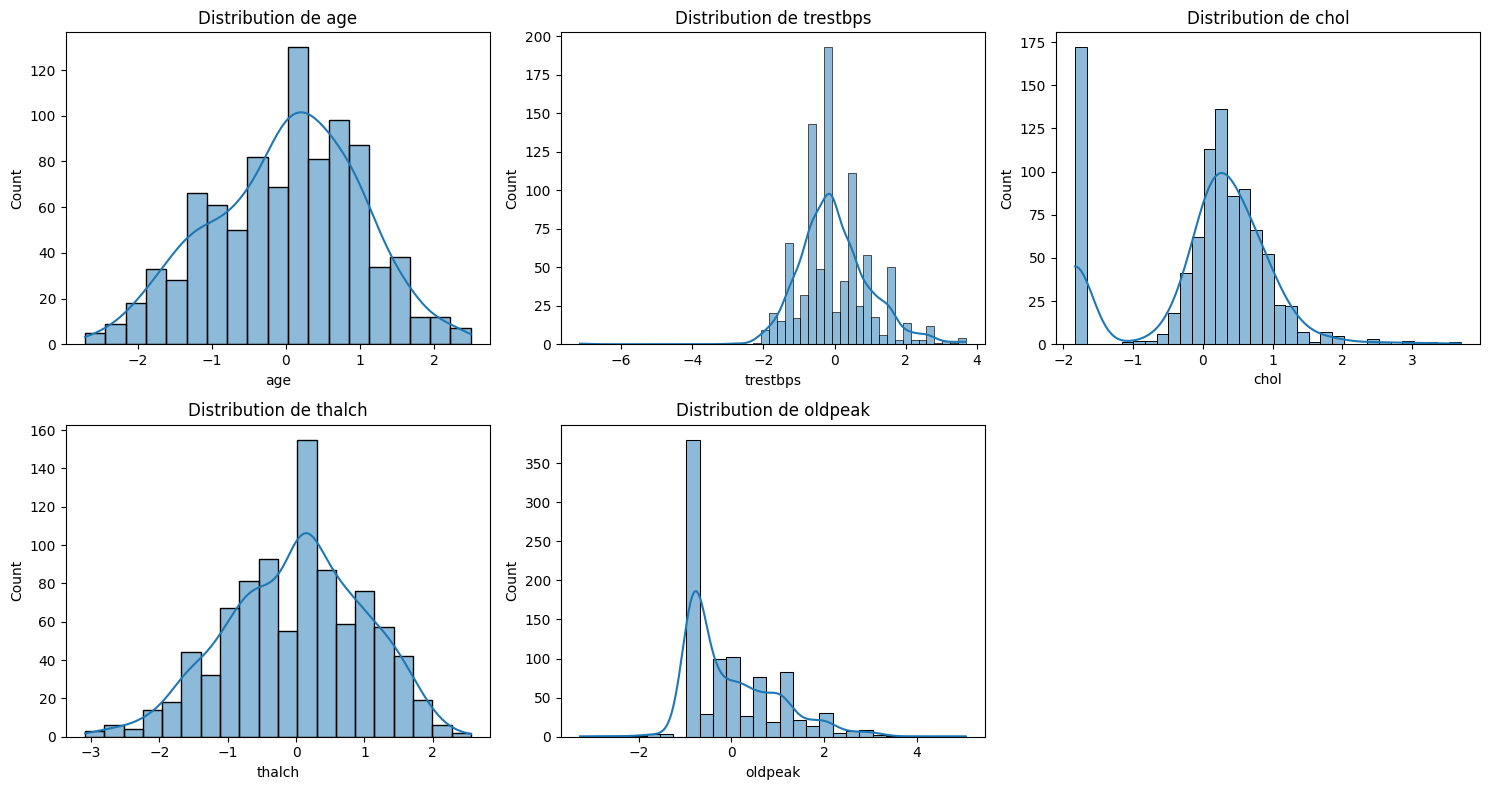

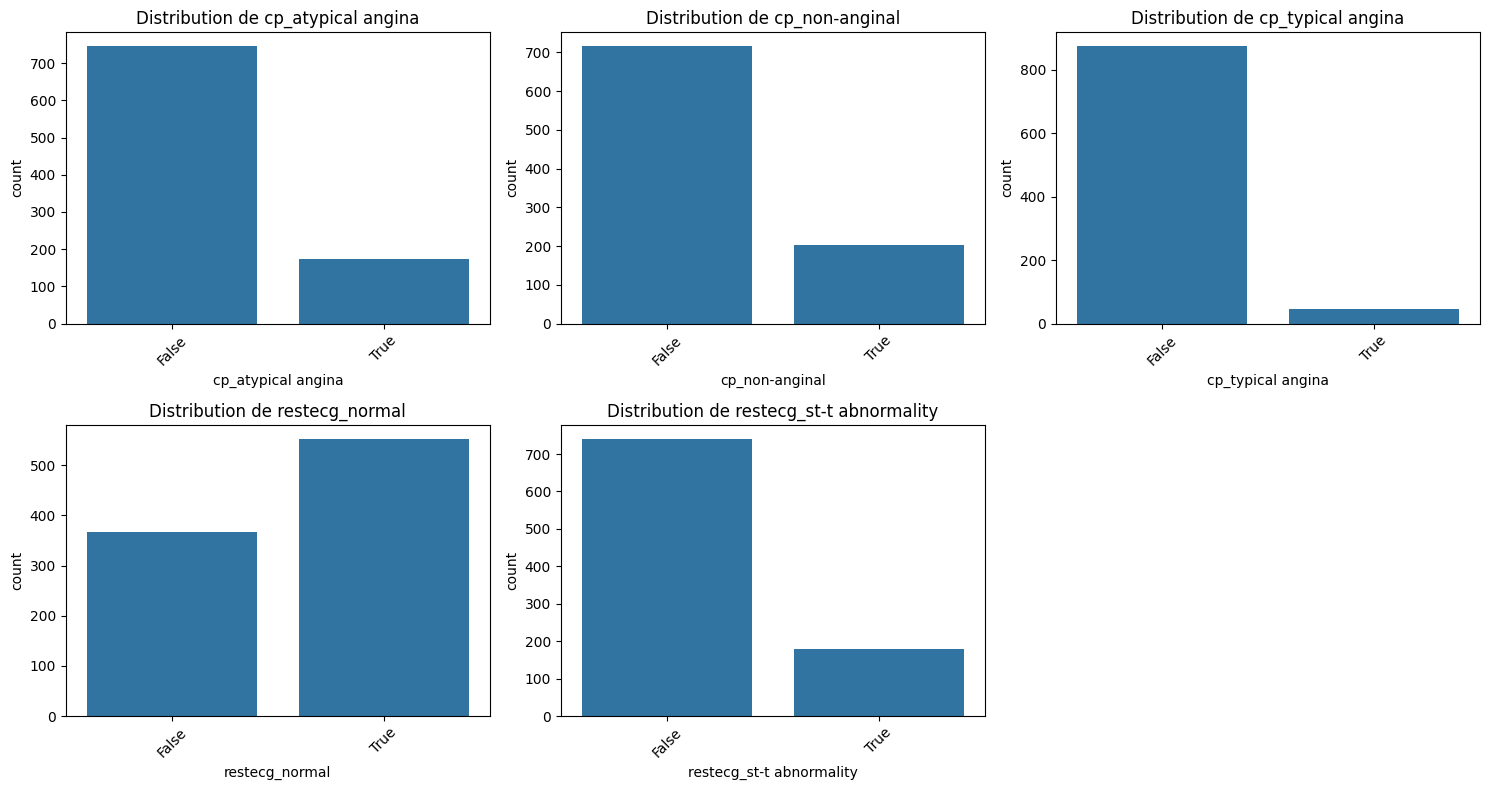

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Analyser la distribution des variables
# --------------------------------------------------
print("="*50)
print("1. Distribution des variables")
print("="*50)

# Distribution des variables numériques (no changes here)
num_cols = ['age', 'trestbps', 'chol', 'thalch', 'oldpeak']
plt.figure(figsize=(15, 8))
for i, col in enumerate(num_cols, 1):
    plt.subplot(2, 3, i)
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution de {col}')
plt.tight_layout()
plt.show()

# Distribution des variables catégorielles ENCODÉES
# Get all encoded columns (e.g., 'cp_1.0', 'cp_2.0', 'restecg_1.0')
encoded_cat_cols = [col for col in df.columns if any(col.startswith(c) for c in ['cp_', 'restecg_', 'slope_', 'ca_', 'thal_'])]

# Plot the first 5 encoded categorical columns
plt.figure(figsize=(15, 8))
for i, col in enumerate(encoded_cat_cols[:5], 1):
    plt.subplot(2, 3, i)
    sns.countplot(x=col, data=df)
    plt.title(f'Distribution de {col}')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


2. Corrélations avec la cible

Corrélation des variables numériques avec la cible :
num         1.000000
oldpeak     0.411588
age         0.339596
trestbps    0.113178
chol       -0.230539
thalch     -0.349173
Name: num, dtype: float64

Corrélation des variables catégorielles avec la cible :
num                         1.000000
thal_reversable defect      0.278313
ca_2.0                      0.171478
ca_3.0                      0.170253
restecg_st-t abnormality    0.131698
ca_1.0                      0.074320
slope_flat                  0.031161
cp_typical angina          -0.055896
slope_upsloping            -0.142565
cp_non-anginal             -0.156050
Name: num, dtype: float64

3. Visualisations des données


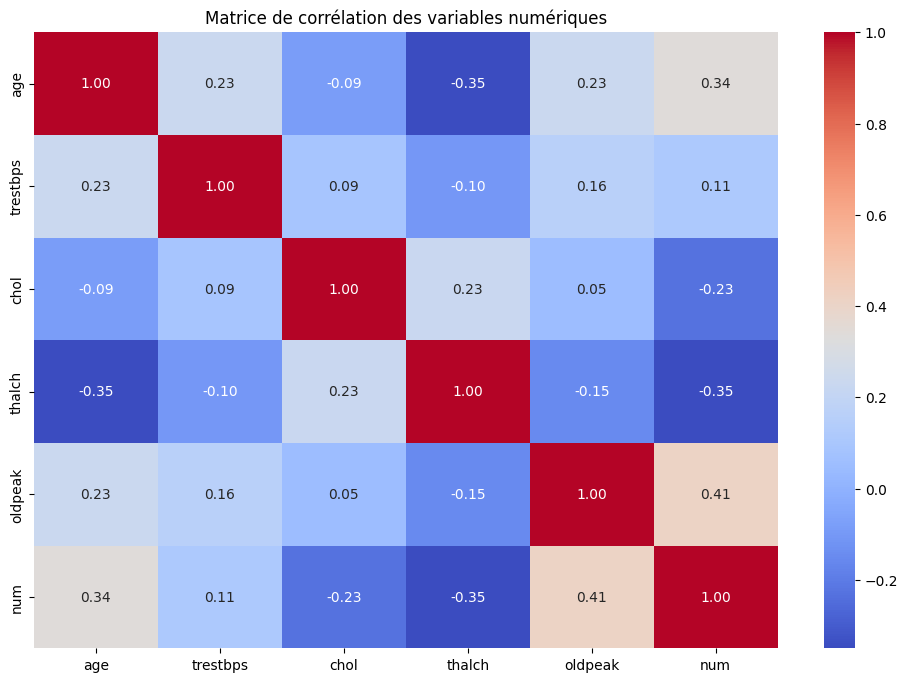

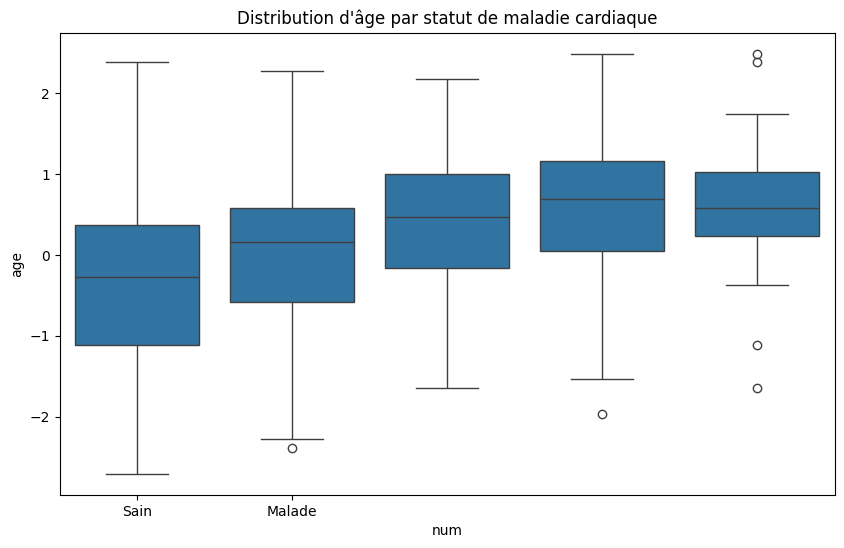

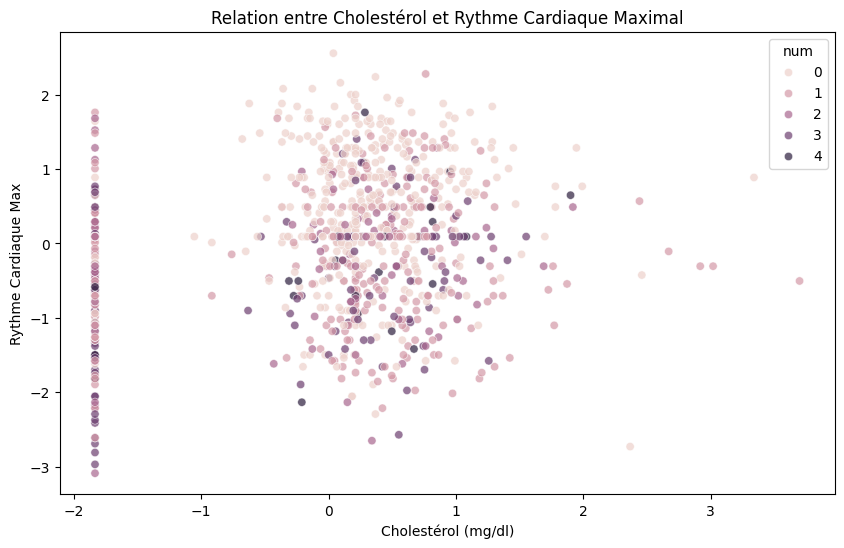

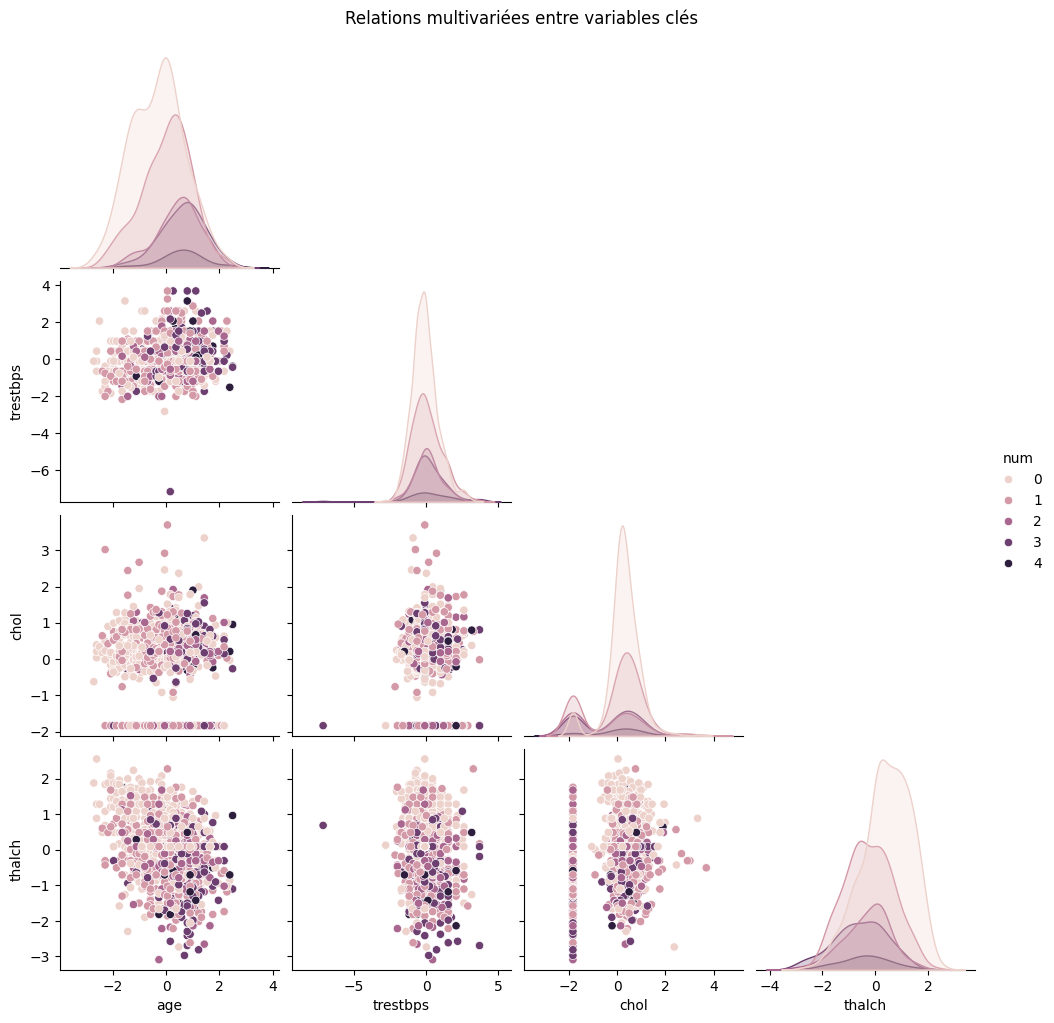

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# 2. Corrélations avec la cible
# --------------------------------------------------
print("\n" + "="*50)
print("2. Corrélations avec la cible")
print("="*50)

# Corrélations numériques
corr_matrix = df[num_cols + ['num']].corr()
target_corr = corr_matrix['num'].sort_values(ascending=False)

print("\nCorrélation des variables numériques avec la cible :")
print(target_corr)

# Corrélations pour les variables catégorielles encodées
encoded_cat_cols = [col for col in df.columns if any(col.startswith(c) for c in cat_cols)]
cat_target_corr = df[encoded_cat_cols + ['num']].corr()['num'].sort_values(ascending=False)

print("\nCorrélation des variables catégorielles avec la cible :")
print(cat_target_corr.head(10))

# 3. Visualisations
# --------------------------------------------------
print("\n" + "="*50)
print("3. Visualisations des données")
print("="*50)

# Heatmap des corrélations
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matrice de corrélation des variables numériques')
plt.show()

# Relation entre l'âge et la cible
plt.figure(figsize=(10, 6))
sns.boxplot(x='num', y='age', data=df)
plt.title('Distribution d\'âge par statut de maladie cardiaque')
plt.xticks([0, 1], ['Sain', 'Malade'])
plt.show()

# Scatter plot: Cholesterol vs Max Heart Rate
plt.figure(figsize=(10, 6))
sns.scatterplot(x='chol', y='thalch', hue='num', data=df, alpha=0.7)
plt.title('Relation entre Cholestérol et Rythme Cardiaque Maximal')
plt.xlabel('Cholestérol (mg/dl)')
plt.ylabel('Rythme Cardiaque Max')
plt.show()

# Pairplot pour les variables clés
sns.pairplot(df[['age', 'trestbps', 'chol', 'thalch', 'num']], hue='num', corner=True)
plt.suptitle('Relations multivariées entre variables clés', y=1.02)
plt.show()